### 使用最小二乘法拟和曲线

举例：我们用目标函数y=sin2pix, 加上一个正态分布的噪音干扰，用多项式去拟合

In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# ps: numpy.poly1d([1,2,3]) 生成 1x^2+2x^1+3x^0*

# 目标函数
def real_func(x):
    return np.sin(2*np.pi*x)

# 多项式
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [3]:
# 十个点
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0, 0.1) + y1 for y1 in y_]


def fitting(M=0):
    """
    M    为 多项式的次数
    """
    # 随机初始化多项式参数
    p_init = np.random.rand(M + 1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])

    # 可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

Fitting Parameters: [0.0105324]


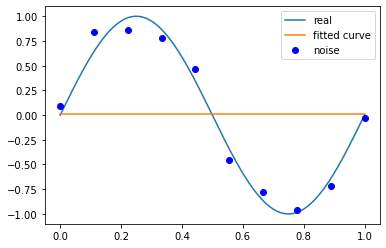

In [4]:
# M=0
p_lsq_0 = fitting(M=0)

Fitting Parameters: [-1.46213874  0.74160177]


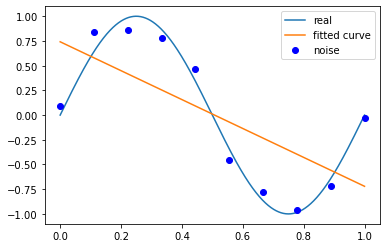

In [5]:
# M=1
p_lsq_1 = fitting(M=1)

Fitting Parameters: [ 19.7412991  -29.41756875   9.57896147   0.08798351]


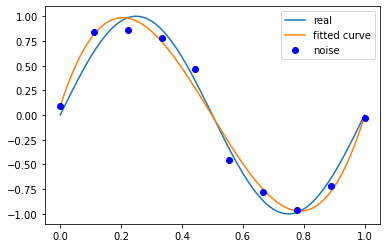

In [7]:
# M=3
p_lsq_3 = fitting(M=3)

Fitting Parameters: [-3.93809448e+04  1.75641653e+05 -3.27747296e+05  3.31769557e+05
 -1.97440692e+05  6.99223376e+04 -1.41690430e+04  1.45516607e+03
 -5.08671585e+01  9.54729954e-02]


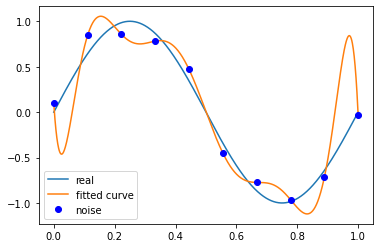

In [8]:
# M=9
p_lsq_9 = fitting(M=9)

# 当M=9时，多项式曲线通过了每个数据点，但是造成了过拟合

### 正则化

In [9]:
regularization = 0.0001


def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret,
                    np.sqrt(0.5 * regularization * np.square(p)))  # L2范数作为正则化项
    return ret

In [10]:
# 最小二乘法,加正则化项
p_init = np.random.rand(9 + 1)
p_lsq_regularization = leastsq(
    residuals_func_regularization, p_init, args=(x, y))

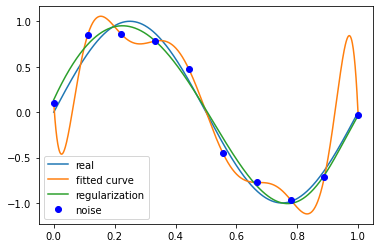

In [11]:
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(
    x_points,
    fit_func(p_lsq_regularization[0], x_points),
    label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()

### 感知机

二分类模型

In [12]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

# load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

In [13]:
df.columns = [
    'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
]
df.label.value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

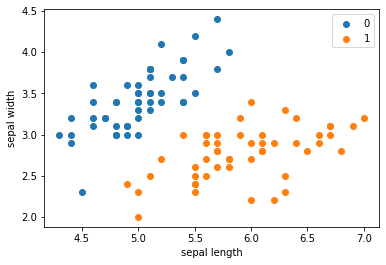

In [14]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [17]:
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
y = np.array([1 if i == 1 else -1 for i in y])

In [18]:
# 感知器  Perceptron

# 数据线性可分，二分类数据
# 此处为一元一次线性方程
class Model:
    def __init__(self):
        self.w = np.ones(len(data[0]) - 1, dtype=np.float32)
        self.b = 0
        self.l_rate = 0.1
        # self.data = data

    def sign(self, x, w, b):
        y = np.dot(x, w) + b
        return y

    # 随机梯度下降法
    def fit(self, X_train, y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                if y * self.sign(X, self.w, self.b) <= 0:
                    self.w = self.w + self.l_rate * np.dot(y, X)
                    self.b = self.b + self.l_rate * y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
        return 'Perceptron Model!'

    def score(self):
        pass

In [19]:
perceptron = Model()
perceptron.fit(X, y)

'Perceptron Model!'

C:\Users\84780\AppData\Local\Temp/ipykernel_15872/3404503885.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
C:\Users\84780\AppData\Local\Temp/ipykernel_15872/3404503885.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')


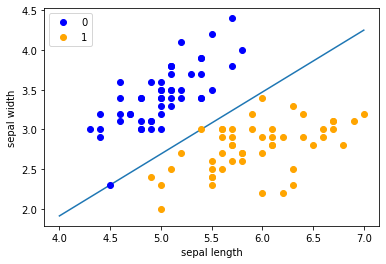

In [20]:
x_points = np.linspace(4, 7, 10)
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

scikit-learn实例

In [21]:
import sklearn
from sklearn.linear_model import Perceptron
sklearn.__version__

'0.24.2'

In [22]:
clf = Perceptron(fit_intercept=True, 
                 max_iter=1000, 
                 shuffle=True)
clf.fit(X, y)

Perceptron()

In [23]:
# Weights assigned to the features.
print(clf.coef_)

[[ 23.2 -38.7]]


In [24]:
# 截距 Constants in decision function.
print(clf.intercept_)

[-5.]


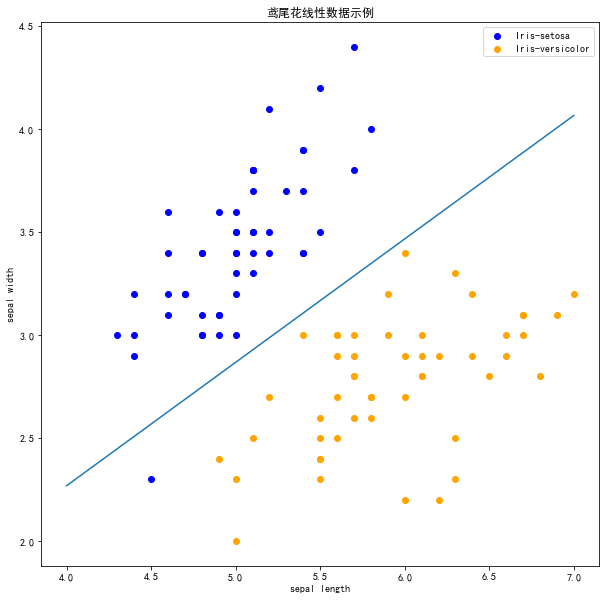

In [25]:
# 画布大小
plt.figure(figsize=(10,10))

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('鸢尾花线性数据示例')

plt.scatter(data[:50, 0], data[:50, 1], c='b', label='Iris-setosa',)
plt.scatter(data[50:100, 0], data[50:100, 1], c='orange', label='Iris-versicolor')

# 画感知机的线
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

在上图中，有一个位于左下角的蓝点没有被正确分类，这是因为 SKlearn 的 Perceptron 实例中有一个tol参数。

tol 参数规定了如果本次迭代的损失和上次迭代的损失之差小于一个特定值时，停止迭代。所以我们需要设置 tol=None 使之可以继续迭代：

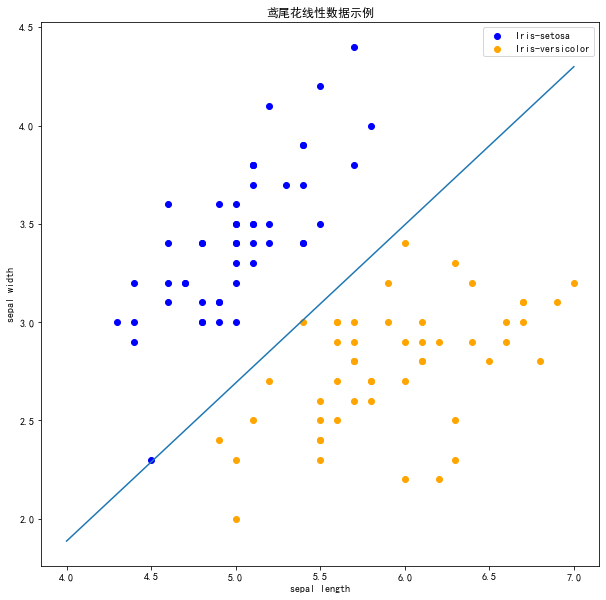

In [26]:
clf = Perceptron(fit_intercept=True, 
                 max_iter=1000,
                 tol=None,
                 shuffle=True)
clf.fit(X, y)

# 画布大小
plt.figure(figsize=(10,10))

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('鸢尾花线性数据示例')

plt.scatter(data[:50, 0], data[:50, 1], c='b', label='Iris-setosa',)
plt.scatter(data[50:100, 0], data[50:100, 1], c='orange', label='Iris-versicolor')

# 画感知机的线
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

### k近邻法

In [39]:
import math
from itertools import combinations

def L(x, y, p=2):
    # x1 = [1, 1], x2 = [5,1]
    if len(x) == len(y) and len(x) > 1:
        sum = 0
        for i in range(len(x)):
            sum += math.pow(abs(x[i] - y[i]), p)
        return math.pow(sum, 1 / p)
    else:
        return 0

In [40]:
x1 = [1, 1]
x2 = [5, 1]
x3 = [4, 4]

# x1, x2
for i in range(1, 5):
    r = {'1-{}'.format(c): L(x1, c, p=i) for c in [x2, x3]}
    print(min(zip(r.values(), r.keys())))

(4.0, '1-[5, 1]')
(4.0, '1-[5, 1]')
(3.7797631496846193, '1-[4, 4]')
(3.5676213450081633, '1-[4, 4]')


In [41]:
# python实现，遍历所有数据点，找出n个距离最近的点的分类情况，少数服从多数

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter

# data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
# data = np.array(df.iloc[:100, [0, 1, -1]])

df

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


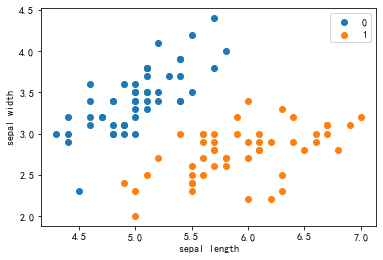

In [42]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [43]:
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
class KNN:
    def __init__(self, X_train, y_train, n_neighbors=3, p=2):
        """
        parameter: n_neighbors 临近点个数
        parameter: p 距离度量
        """
        self.n = n_neighbors
        self.p = p
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X):
        # 取出n个点
        knn_list = []
        for i in range(self.n):
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)
            knn_list.append((dist, self.y_train[i]))

        for i in range(self.n, len(self.X_train)):
            max_index = knn_list.index(max(knn_list, key=lambda x: x[0]))
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)
            if knn_list[max_index][0] > dist:
                knn_list[max_index] = (dist, self.y_train[i])

        # 统计
        knn = [k[-1] for k in knn_list]
        count_pairs = Counter(knn)
#         max_count = sorted(count_pairs, key=lambda x: x)[-1]
        max_count = sorted(count_pairs.items(), key=lambda x: x[1])[-1][0]
        return max_count

    def score(self, X_test, y_test):
        right_count = 0
        n = 10
        for X, y in zip(X_test, y_test):
            label = self.predict(X)
            if label == y:
                right_count += 1
        return right_count / len(X_test)

In [45]:
clf = KNN(X_train, y_train)

clf.score(X_test, y_test)

1.0

In [46]:
test_point = [6.0, 3.0]
print('Test Point: {}'.format(clf.predict(test_point)))

Test Point: 1.0


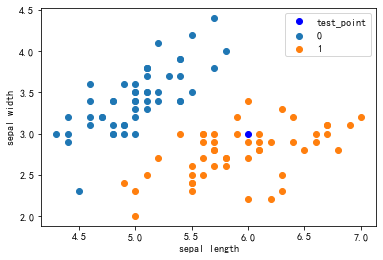

In [47]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.plot(test_point[0], test_point[1], 'bo', label='test_point')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

scikit-learn实例

In [48]:
from sklearn.neighbors import KNeighborsClassifier

clf_sk = KNeighborsClassifier()
clf_sk.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
clf_sk.score(X_test, y_test)

1.0

kd树

In [1]:
# kd-tree每个结点中主要包含的数据结构如下
class KdNode(object):
    def __init__(self, dom_elt, split, left, right):
        self.dom_elt = dom_elt  # k维向量节点(k维空间中的一个样本点)
        self.split = split  # 整数（进行分割维度的序号）
        self.left = left  # 该结点分割超平面左子空间构成的kd-tree
        self.right = right  # 该结点分割超平面右子空间构成的kd-tree


class KdTree(object):
    def __init__(self, data):
        k = len(data[0])  # 数据维度

        def CreateNode(split, data_set):  # 按第split维划分数据集exset创建KdNode
            if not data_set:  # 数据集为空
                return None
            # key参数的值为一个函数，此函数只有一个参数且返回一个值用来进行比较
            # operator模块提供的itemgetter函数用于获取对象的哪些维的数据，参数为需要获取的数据在对象中的序号
            #data_set.sort(key=itemgetter(split)) # 按要进行分割的那一维数据排序
            data_set.sort(key=lambda x: x[split])
            split_pos = len(data_set) // 2  # //为Python中的整数除法
            median = data_set[split_pos]  # 中位数分割点
            split_next = (split + 1) % k  # cycle coordinates

            # 递归的创建kd树
            return KdNode(
                median,
                split,
                CreateNode(split_next, data_set[:split_pos]),  # 创建左子树
                CreateNode(split_next, data_set[split_pos + 1:]))  # 创建右子树

        self.root = CreateNode(0, data)  # 从第0维分量开始构建kd树,返回根节点


# KDTree的前序遍历
def preorder(root):
    print(root.dom_elt)
    if root.left:  # 节点不为空
        preorder(root.left)
    if root.right:
        preorder(root.right)

In [2]:
# 对构建好的kd树进行搜索，寻找与目标点最近的样本点：
from math import sqrt
from collections import namedtuple

# 定义一个namedtuple,分别存放最近坐标点、最近距离和访问过的节点数
result = namedtuple("Result_tuple",
                    "nearest_point  nearest_dist  nodes_visited")


def find_nearest(tree, point):
    k = len(point)  # 数据维度

    def travel(kd_node, target, max_dist):
        if kd_node is None:
            return result([0] * k, float("inf"),
                          0)  # python中用float("inf")和float("-inf")表示正负无穷

        nodes_visited = 1

        s = kd_node.split  # 进行分割的维度
        pivot = kd_node.dom_elt  # 进行分割的“轴”

        if target[s] <= pivot[s]:  # 如果目标点第s维小于分割轴的对应值(目标离左子树更近)
            nearer_node = kd_node.left  # 下一个访问节点为左子树根节点
            further_node = kd_node.right  # 同时记录下右子树
        else:  # 目标离右子树更近
            nearer_node = kd_node.right  # 下一个访问节点为右子树根节点
            further_node = kd_node.left

        temp1 = travel(nearer_node, target, max_dist)  # 进行遍历找到包含目标点的区域

        nearest = temp1.nearest_point  # 以此叶结点作为“当前最近点”
        dist = temp1.nearest_dist  # 更新最近距离

        nodes_visited += temp1.nodes_visited

        if dist < max_dist:
            max_dist = dist  # 最近点将在以目标点为球心，max_dist为半径的超球体内

        temp_dist = abs(pivot[s] - target[s])  # 第s维上目标点与分割超平面的距离
        if max_dist < temp_dist:  # 判断超球体是否与超平面相交
            return result(nearest, dist, nodes_visited)  # 不相交则可以直接返回，不用继续判断

        #----------------------------------------------------------------------
        # 计算目标点与分割点的欧氏距离
        temp_dist = sqrt(sum((p1 - p2)**2 for p1, p2 in zip(pivot, target)))

        if temp_dist < dist:  # 如果“更近”
            nearest = pivot  # 更新最近点
            dist = temp_dist  # 更新最近距离
            max_dist = dist  # 更新超球体半径

        # 检查另一个子结点对应的区域是否有更近的点
        temp2 = travel(further_node, target, max_dist)

        nodes_visited += temp2.nodes_visited
        if temp2.nearest_dist < dist:  # 如果另一个子结点内存在更近距离
            nearest = temp2.nearest_point  # 更新最近点
            dist = temp2.nearest_dist  # 更新最近距离

        return result(nearest, dist, nodes_visited)

    return travel(tree.root, point, float("inf"))  # 从根节点开始递归

In [3]:
data = [[2,3],[5,4],[9,6],[4,7],[8,1],[7,2]]
kd = KdTree(data)
preorder(kd.root)

[7, 2]
[5, 4]
[2, 3]
[4, 7]
[9, 6]
[8, 1]


In [4]:
from time import perf_counter
from random import random

# 产生一个k维随机向量，每维分量值在0~1之间
def random_point(k):
    return [random() for _ in range(k)]
 
# 产生n个k维随机向量 
def random_points(k, n):
    return [random_point(k) for _ in range(n)]    

ret = find_nearest(kd, [3,4.5])
print (ret)

Result_tuple(nearest_point=[2, 3], nearest_dist=1.8027756377319946, nodes_visited=4)


In [5]:
N = 400000
t0 = perf_counter()
kd2 = KdTree(random_points(3, N))            # 构建包含四十万个3维空间样本点的kd树
ret2 = find_nearest(kd2, [0.1,0.5,0.8])      # 四十万个样本点中寻找离目标最近的点
t1 = perf_counter()
print ("time: ",t1-t0, "s")
print (ret2)

time:  4.186664600000004 s
Result_tuple(nearest_point=[0.09718068224125787, 0.5042817592861986, 0.7995999828116541], nearest_dist=0.0051421813426481364, nodes_visited=44)


### 朴素贝叶斯

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from collections import Counter
import math

# data
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = [
        'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
    ]
    data = np.array(df.iloc[:100, :])
    # print(data)
    return data[:, :-1], data[:, -1]

In [8]:
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_test[0], y_test[0]

(array([5.7, 2.8, 4.5, 1.3]), 1.0)

GaussianNB 高斯朴素贝叶斯

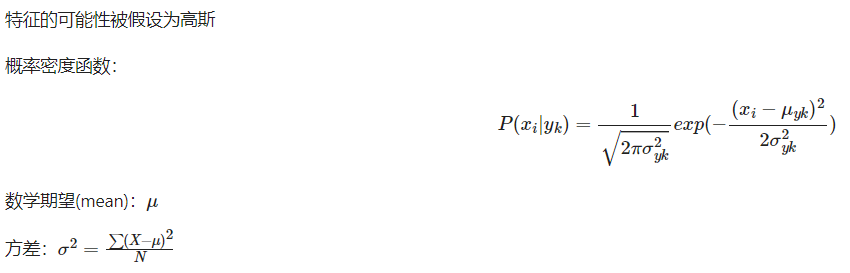

In [9]:
class NaiveBayes:
    def __init__(self):
        self.model = None

    # 数学期望
    @staticmethod
    def mean(X):
        return sum(X) / float(len(X))

    # 标准差（方差）
    def stdev(self, X):
        avg = self.mean(X)
        return math.sqrt(sum([pow(x - avg, 2) for x in X]) / float(len(X)))

    # 概率密度函数
    def gaussian_probability(self, x, mean, stdev):
        exponent = math.exp(-(math.pow(x - mean, 2) /
                              (2 * math.pow(stdev, 2))))
        return (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent

    # 处理X_train
    def summarize(self, train_data):
        summaries = [(self.mean(i), self.stdev(i)) for i in zip(*train_data)]
        return summaries

    # 分类别求出数学期望和标准差
    def fit(self, X, y):
        labels = list(set(y))
        data = {label: [] for label in labels}
        for f, label in zip(X, y):
            data[label].append(f)
        self.model = {
            label: self.summarize(value)
            for label, value in data.items()
        }
        return 'gaussianNB train done!'

    # 计算概率
    def calculate_probabilities(self, input_data):
        # summaries:{0.0: [(5.0, 0.37),(3.42, 0.40)], 1.0: [(5.8, 0.449),(2.7, 0.27)]}
        # input_data:[1.1, 2.2]
        probabilities = {}
        for label, value in self.model.items():
            probabilities[label] = 1
            for i in range(len(value)):
                mean, stdev = value[i]
                probabilities[label] *= self.gaussian_probability(
                    input_data[i], mean, stdev)
        return probabilities

    # 类别
    def predict(self, X_test):
        # {0.0: 2.9680340789325763e-27, 1.0: 3.5749783019849535e-26}
        label = sorted(
            self.calculate_probabilities(X_test).items(),
            key=lambda x: x[-1])[-1][0]
        return label

    def score(self, X_test, y_test):
        right = 0
        for X, y in zip(X_test, y_test):
            label = self.predict(X)
            if label == y:
                right += 1

        return right / float(len(X_test))

In [10]:
model = NaiveBayes()


model.fit(X_train, y_train)

'gaussianNB train done!'

In [11]:
print(model.predict([4.4,  3.2,  1.3,  0.2]))

0.0


In [12]:
model.score(X_test, y_test)

1.0

scikit-learn实例

In [13]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [14]:
clf.score(X_test, y_test)

1.0

In [15]:
clf.predict([[4.4,  3.2,  1.3,  0.2]])

array([0.])

### 决策树

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter
import math
from math import log
import pprint

# 书上题目5.1
def create_data():
    datasets = [['青年', '否', '否', '一般', '否'],
               ['青年', '否', '否', '好', '否'],
               ['青年', '是', '否', '好', '是'],
               ['青年', '是', '是', '一般', '是'],
               ['青年', '否', '否', '一般', '否'],
               ['中年', '否', '否', '一般', '否'],
               ['中年', '否', '否', '好', '否'],
               ['中年', '是', '是', '好', '是'],
               ['中年', '否', '是', '非常好', '是'],
               ['中年', '否', '是', '非常好', '是'],
               ['老年', '否', '是', '非常好', '是'],
               ['老年', '否', '是', '好', '是'],
               ['老年', '是', '否', '好', '是'],
               ['老年', '是', '否', '非常好', '是'],
               ['老年', '否', '否', '一般', '否'],
               ]
    labels = [u'年龄', u'有工作', u'有自己的房子', u'信贷情况', u'类别']
    # 返回数据集和每个维度的名称
    return datasets, labels

In [2]:
datasets, labels = create_data()
train_data = pd.DataFrame(datasets, columns=labels)
train_data

,年龄,有工作,有自己的房子,信贷情况,类别
0,青年,否,否,一般,否
1,青年,否,否,好,否
2,青年,是,否,好,是
3,青年,是,是,一般,是
4,青年,否,否,一般,否
5,中年,否,否,一般,否
6,中年,否,否,好,否
7,中年,是,是,好,是
8,中年,否,是,非常好,是
9,中年,否,是,非常好,是


In [3]:
# 熵
def calc_ent(datasets):
    data_length = len(datasets)
    label_count = {}
    for i in range(data_length):
        label = datasets[i][-1]
        if label not in label_count:
            label_count[label] = 0
        label_count[label] += 1
    ent = -sum([(p / data_length) * log(p / data_length, 2)
                for p in label_count.values()])
    return ent
# def entropy(y):
#     """
#     Entropy of a label sequence
#     """
#     hist = np.bincount(y)
#     ps = hist / np.sum(hist)
#     return -np.sum([p * np.log2(p) for p in ps if p > 0])


# 经验条件熵
def cond_ent(datasets, axis=0):
    data_length = len(datasets)
    feature_sets = {}
    for i in range(data_length):
        feature = datasets[i][axis]
        if feature not in feature_sets:
            feature_sets[feature] = []
        feature_sets[feature].append(datasets[i])
    cond_ent = sum(
        [(len(p) / data_length) * calc_ent(p) for p in feature_sets.values()])
    return cond_ent


# 信息增益
def info_gain(ent, cond_ent):
    return ent - cond_ent


def info_gain_train(datasets):
    count = len(datasets[0]) - 1
    ent = calc_ent(datasets)
#     ent = entropy(datasets)
    best_feature = []
    for c in range(count):
        c_info_gain = info_gain(ent, cond_ent(datasets, axis=c))
        best_feature.append((c, c_info_gain))
        print('特征({}) - info_gain - {:.3f}'.format(labels[c], c_info_gain))
    # 比较大小
    best_ = max(best_feature, key=lambda x: x[-1])
    return '特征({})的信息增益最大，选择为根节点特征'.format(labels[best_[0]])

In [4]:
info_gain_train(np.array(datasets))

特征(年龄) - info_gain - 0.083
特征(有工作) - info_gain - 0.324
特征(有自己的房子) - info_gain - 0.420
特征(信贷情况) - info_gain - 0.363


'特征(有自己的房子)的信息增益最大，选择为根节点特征'

利用ID3算法生成决策树，例5.3

In [5]:
# 定义节点类 二叉树
class Node:
    def __init__(self, root=True, label=None, feature_name=None, feature=None):
        self.root = root
        self.label = label
        self.feature_name = feature_name
        self.feature = feature
        self.tree = {}
        self.result = {
            'label:': self.label,
            'feature': self.feature,
            'tree': self.tree
        }

    def __repr__(self):
        return '{}'.format(self.result)

    def add_node(self, val, node):
        self.tree[val] = node

    def predict(self, features):
        if self.root is True:
            return self.label
        return self.tree[features[self.feature]].predict(features)


class DTree:
    def __init__(self, epsilon=0.1):
        self.epsilon = epsilon
        self._tree = {}

    # 熵
    @staticmethod
    def calc_ent(datasets):
        data_length = len(datasets)
        label_count = {}
        for i in range(data_length):
            label = datasets[i][-1]
            if label not in label_count:
                label_count[label] = 0
            label_count[label] += 1
        ent = -sum([(p / data_length) * log(p / data_length, 2)
                    for p in label_count.values()])
        return ent

    # 经验条件熵
    def cond_ent(self, datasets, axis=0):
        data_length = len(datasets)
        feature_sets = {}
        for i in range(data_length):
            feature = datasets[i][axis]
            if feature not in feature_sets:
                feature_sets[feature] = []
            feature_sets[feature].append(datasets[i])
        cond_ent = sum([(len(p) / data_length) * self.calc_ent(p)
                        for p in feature_sets.values()])
        return cond_ent

    # 信息增益
    @staticmethod
    def info_gain(ent, cond_ent):
        return ent - cond_ent

    def info_gain_train(self, datasets):
        count = len(datasets[0]) - 1
        ent = self.calc_ent(datasets)
        best_feature = []
        for c in range(count):
            c_info_gain = self.info_gain(ent, self.cond_ent(datasets, axis=c))
            best_feature.append((c, c_info_gain))
        # 比较大小
        best_ = max(best_feature, key=lambda x: x[-1])
        return best_

    def train(self, train_data):
        """
        input:数据集D(DataFrame格式)，特征集A，阈值eta
        output:决策树T
        """
        _, y_train, features = train_data.iloc[:, :
                                               -1], train_data.iloc[:,
                                                                    -1], train_data.columns[:
                                                                                            -1]
        # 1,若D中实例属于同一类Ck，则T为单节点树，并将类Ck作为结点的类标记，返回T
        if len(y_train.value_counts()) == 1:
            return Node(root=True, label=y_train.iloc[0])

        # 2, 若A为空，则T为单节点树，将D中实例树最大的类Ck作为该节点的类标记，返回T
        if len(features) == 0:
            return Node(
                root=True,
                label=y_train.value_counts().sort_values(
                    ascending=False).index[0])

        # 3,计算最大信息增益 同5.1,Ag为信息增益最大的特征
        max_feature, max_info_gain = self.info_gain_train(np.array(train_data))
        max_feature_name = features[max_feature]

        # 4,Ag的信息增益小于阈值eta,则置T为单节点树，并将D中是实例数最大的类Ck作为该节点的类标记，返回T
        if max_info_gain < self.epsilon:
            return Node(
                root=True,
                label=y_train.value_counts().sort_values(
                    ascending=False).index[0])

        # 5,构建Ag子集
        node_tree = Node(
            root=False, feature_name=max_feature_name, feature=max_feature)

        feature_list = train_data[max_feature_name].value_counts().index
        for f in feature_list:
            sub_train_df = train_data.loc[train_data[max_feature_name] ==
                                          f].drop([max_feature_name], axis=1)

            # 6, 递归生成树
            sub_tree = self.train(sub_train_df)
            node_tree.add_node(f, sub_tree)

        # pprint.pprint(node_tree.tree)
        return node_tree

    def fit(self, train_data):
        self._tree = self.train(train_data)
        return self._tree

    def predict(self, X_test):
        return self._tree.predict(X_test)

In [6]:
datasets, labels = create_data()
data_df = pd.DataFrame(datasets, columns=labels)
dt = DTree()
tree = dt.fit(data_df)
tree

{'label:': None, 'feature': 2, 'tree': {'否': {'label:': None, 'feature': 1, 'tree': {'否': {'label:': '否', 'feature': None, 'tree': {}}, '是': {'label:': '是', 'feature': None, 'tree': {}}}}, '是': {'label:': '是', 'feature': None, 'tree': {}}}}

In [7]:
dt.predict(['老年', '否', '否', '一般'])

'否'

scikit-learn实例

In [8]:
# data
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = [
        'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
    ]
    data = np.array(df.iloc[:100, [0, 1, -1]])
    # print(data)
    return data[:, :2], data[:, -1]


X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train,)

DecisionTreeClassifier()

In [10]:
clf.score(X_test, y_test)

0.9666666666666667

In [11]:
tree_pic = export_graphviz(clf, out_file="mytree.pdf")
with open('mytree.pdf') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

注意import graphviz安装路径啥的错误

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

### 逻辑斯谛回归

In [4]:
from math import exp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# data
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:100, [0,1,-1]])
    # print(data)
    return data[:,:2], data[:,-1]

X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [5]:
class LogisticReressionClassifier:
    def __init__(self, max_iter=200, learning_rate=0.01):
        self.max_iter = max_iter
        self.learning_rate = learning_rate

    def sigmoid(self, x):
        return 1 / (1 + exp(-x))

    def data_matrix(self, X):
        data_mat = []
        for d in X:
            data_mat.append([1.0, *d])
        return data_mat

    def fit(self, X, y):
        # label = np.mat(y)
        data_mat = self.data_matrix(X)  # m*n
        self.weights = np.zeros((len(data_mat[0]), 1), dtype=np.float32)

        for iter_ in range(self.max_iter):
            for i in range(len(X)):
                result = self.sigmoid(np.dot(data_mat[i], self.weights))
                error = y[i] - result
                self.weights += self.learning_rate * error * np.transpose(
                    [data_mat[i]])
        print('LogisticRegression Model(learning_rate={},max_iter={})'.format(
            self.learning_rate, self.max_iter))

    # def f(self, x):
    #     return -(self.weights[0] + self.weights[1] * x) / self.weights[2]

    def score(self, X_test, y_test):
        right = 0
        X_test = self.data_matrix(X_test)
        for x, y in zip(X_test, y_test):
            result = np.dot(x, self.weights)
            if (result > 0 and y == 1) or (result < 0 and y == 0):
                right += 1
        return right / len(X_test)

In [6]:
lr_clf = LogisticReressionClassifier()
lr_clf.fit(X_train, y_train)

LogisticRegression Model(learning_rate=0.01,max_iter=200)


In [7]:
lr_clf.score(X_test, y_test)

1.0

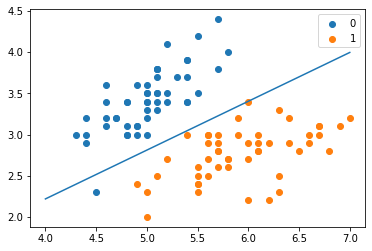

In [8]:
x_ponits = np.arange(4, 8)
y_ = -(lr_clf.weights[1]*x_ponits + lr_clf.weights[0])/lr_clf.weights[2]
plt.plot(x_ponits, y_)

#lr_clf.show_graph()
plt.scatter(X[:50,0],X[:50,1], label='0')
plt.scatter(X[50:,0],X[50:,1], label='1')
plt.legend()

scikit-learn实例

In [9]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=200)

clf.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [10]:
clf.score(X_test, y_test)

1.0

In [11]:
print(clf.coef_, clf.intercept_)

[[ 2.64480081 -2.69487557]] [-5.83882862]


C:\Users\84780\AppData\Local\Temp/ipykernel_9140/1111466959.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(X[:50, 0], X[:50, 1], 'bo', color='blue', label='0')
C:\Users\84780\AppData\Local\Temp/ipykernel_9140/1111466959.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(X[50:, 0], X[50:, 1], 'bo', color='orange', label='1')


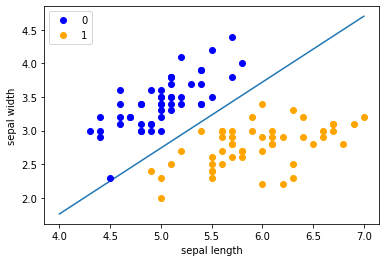

In [12]:
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

plt.plot(X[:50, 0], X[:50, 1], 'bo', color='blue', label='0')
plt.plot(X[50:, 0], X[50:, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

最大熵模型

In [13]:
import math
from copy import deepcopy

class MaxEntropy:
    def __init__(self, EPS=0.005):
        self._samples = []
        self._Y = set()  # 标签集合，相当去去重后的y
        self._numXY = {}  # key为(x,y)，value为出现次数
        self._N = 0  # 样本数
        self._Ep_ = []  # 样本分布的特征期望值
        self._xyID = {}  # key记录(x,y),value记录id号
        self._n = 0  # 特征键值(x,y)的个数
        self._C = 0  # 最大特征数
        self._IDxy = {}  # key为(x,y)，value为对应的id号
        self._w = []
        self._EPS = EPS  # 收敛条件
        self._lastw = []  # 上一次w参数值

    def loadData(self, dataset):
        self._samples = deepcopy(dataset)
        for items in self._samples:
            y = items[0]
            X = items[1:]
            self._Y.add(y)  # 集合中y若已存在则会自动忽略
            for x in X:
                if (x, y) in self._numXY:
                    self._numXY[(x, y)] += 1
                else:
                    self._numXY[(x, y)] = 1

        self._N = len(self._samples)
        self._n = len(self._numXY)
        self._C = max([len(sample) - 1 for sample in self._samples])
        self._w = [0] * self._n
        self._lastw = self._w[:]

        self._Ep_ = [0] * self._n
        for i, xy in enumerate(self._numXY):  # 计算特征函数fi关于经验分布的期望
            self._Ep_[i] = self._numXY[xy] / self._N
            self._xyID[xy] = i
            self._IDxy[i] = xy

    def _Zx(self, X):  # 计算每个Z(x)值
        zx = 0
        for y in self._Y:
            ss = 0
            for x in X:
                if (x, y) in self._numXY:
                    ss += self._w[self._xyID[(x, y)]]
            zx += math.exp(ss)
        return zx

    def _model_pyx(self, y, X):  # 计算每个P(y|x)
        zx = self._Zx(X)
        ss = 0
        for x in X:
            if (x, y) in self._numXY:
                ss += self._w[self._xyID[(x, y)]]
        pyx = math.exp(ss) / zx
        return pyx

    def _model_ep(self, index):  # 计算特征函数fi关于模型的期望
        x, y = self._IDxy[index]
        ep = 0
        for sample in self._samples:
            if x not in sample:
                continue
            pyx = self._model_pyx(y, sample)
            ep += pyx / self._N
        return ep

    def _convergence(self):  # 判断是否全部收敛
        for last, now in zip(self._lastw, self._w):
            if abs(last - now) >= self._EPS:
                return False
        return True

    def predict(self, X):  # 计算预测概率
        Z = self._Zx(X)
        result = {}
        for y in self._Y:
            ss = 0
            for x in X:
                if (x, y) in self._numXY:
                    ss += self._w[self._xyID[(x, y)]]
            pyx = math.exp(ss) / Z
            result[y] = pyx
        return result

    def train(self, maxiter=1000):  # 训练数据
        for loop in range(maxiter):  # 最大训练次数
            print("iter:%d" % loop)
            self._lastw = self._w[:]
            for i in range(self._n):
                ep = self._model_ep(i)  # 计算第i个特征的模型期望
                self._w[i] += math.log(self._Ep_[i] / ep) / self._C  # 更新参数
            print("w:", self._w)
            if self._convergence():  # 判断是否收敛
                break

In [14]:
dataset = [['no', 'sunny', 'hot', 'high', 'FALSE'],
           ['no', 'sunny', 'hot', 'high', 'TRUE'],
           ['yes', 'overcast', 'hot', 'high', 'FALSE'],
           ['yes', 'rainy', 'mild', 'high', 'FALSE'],
           ['yes', 'rainy', 'cool', 'normal', 'FALSE'],
           ['no', 'rainy', 'cool', 'normal', 'TRUE'],
           ['yes', 'overcast', 'cool', 'normal', 'TRUE'],
           ['no', 'sunny', 'mild', 'high', 'FALSE'],
           ['yes', 'sunny', 'cool', 'normal', 'FALSE'],
           ['yes', 'rainy', 'mild', 'normal', 'FALSE'],
           ['yes', 'sunny', 'mild', 'normal', 'TRUE'],
           ['yes', 'overcast', 'mild', 'high', 'TRUE'],
           ['yes', 'overcast', 'hot', 'normal', 'FALSE'],
           ['no', 'rainy', 'mild', 'high', 'TRUE']]

maxent = MaxEntropy()
x = ['overcast', 'mild', 'high', 'FALSE']

maxent.loadData(dataset)
maxent.train()

iter:0
w: [0.0455803891984887, -0.002832177999673058, 0.031103560672370825, -0.1772024616282862, -0.0037548445453157455, 0.16394435955437575, -0.02051493923938058, -0.049675901430111545, 0.08288783767234777, 0.030474400362443962, 0.05913652210443954, 0.08028783103573349, 0.1047516055195683, -0.017733409097415182, -0.12279936099838235, -0.2525211841208849, -0.033080678592754015, -0.06511302013721994, -0.08720030253991244]
iter:1
w: [0.11525071899801315, 0.019484939219927316, 0.07502777039579785, -0.29094979172869884, 0.023544184009850026, 0.2833018051925922, -0.04928887087664562, -0.101950931659509, 0.12655289130431963, 0.016078718904129236, 0.09710585487843026, 0.10327329399123442, 0.16183727320804359, 0.013224083490515591, -0.17018583153306513, -0.44038644519804815, -0.07026660158873668, -0.11606564516054546, -0.1711390483931799]
iter:2
w: [0.18178907332733973, 0.04233703122822168, 0.11301330241050131, -0.37456674484068975, 0.05599764270990431, 0.38356978711239126, -0.0748854616816094

w: [2.533411858550867, 0.07482430022714286, 1.0844509330542977, -2.9763208439694617, 1.1386990412494076, 3.6583949082237335, -0.17267207822321484, -1.4971979345452533, 0.9971102489040188, -1.2900895840198685, 1.360557408043383, -0.8043893398730136, 1.1848277021735987, 2.06742048448767, 2.538259536982307, -6.274930921870802, -1.2134230737638876, -2.372996352261941, -3.6911682088584414]
iter:227
w: [2.5379516222457026, 0.07457713007231175, 1.0865080405669594, -2.9816028103071712, 1.1410135358398987, 3.6641913951638756, -0.17243664031689038, -1.5000101931124143, 0.9988324744343832, -1.2921469915952295, 1.3626633544750326, -0.806185714977737, 1.186803635200188, 2.070504171480753, 2.543622743811167, -6.2867656128127924, -1.2157915264311998, -2.3770230444146705, -3.698121154477376]
iter:228
w: [2.542477032448858, 0.07433164623559846, 1.0885580464844287, -2.9868684835865715, 1.1433208684577998, 3.669970265947685, -0.17220275549920047, -1.5028126924498937, 1.000549442271178, -1.294198643995149

w: [3.4109435664437173, 0.04218371659631231, 1.4708936797745942, -4.000069679144984, 1.5863444576408288, 4.79042401796763, -0.14116056312752612, -2.024295484903475, 1.3319449172295652, -1.6998087847855436, 1.7578201460654264, -1.127904838952454, 1.559770880876722, 2.6814467679847787, 3.5032967039016025, -8.523759098132244, -1.6692161022362841, -3.140792299331545, -5.032661409250403]
iter:489
w: [3.413503358086898, 0.042125378861913476, 1.4719920166710732, -4.003055212090293, 1.5876471557816698, 4.793753364916261, -0.14110352695827905, -2.025789277880583, 1.3329244250898196, -1.7010318402027618, 1.7589565009367005, -1.1287916291006723, 1.5608460387812904, 2.683279715416967, 3.5059415912429084, -8.53021301223033, -1.6705368830066651, -3.143008051295355, -5.0365646301223626]
iter:490
w: [3.416059055619798, 0.04206729924026686, 1.4730884643175142, -4.006035937234869, 1.5889477450740768, 4.797077502856363, -0.14104674058908628, -2.0272804732727665, 1.3339023729201842, -1.702253056840145, 1.

In [15]:
print('predict:', maxent.predict(x))

predict: {'no': 2.819781341881656e-06, 'yes': 0.9999971802186581}


### 支持向量机

In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import  train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# data
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = [
        'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
    ]
    data = np.array(df.iloc[:100, [0, 1, -1]])
    for i in range(len(data)):
        if data[i, -1] == 0:
            data[i, -1] = -1
    # print(data)
    return data[:, :2], data[:, -1]

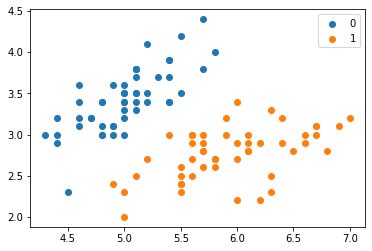

In [17]:
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

plt.scatter(X[:50,0],X[:50,1], label='0')
plt.scatter(X[50:,0],X[50:,1], label='1')
plt.legend()

In [18]:
class SVM:
    def __init__(self, max_iter=100, kernel='linear'):
        self.max_iter = max_iter
        self._kernel = kernel

    def init_args(self, features, labels):
        self.m, self.n = features.shape
        self.X = features
        self.Y = labels
        self.b = 0.0

        # 将Ei保存在一个列表里
        self.alpha = np.ones(self.m)
        self.E = [self._E(i) for i in range(self.m)]
        # 松弛变量
        self.C = 1.0

    def _KKT(self, i):
        y_g = self._g(i) * self.Y[i]
        if self.alpha[i] == 0:
            return y_g >= 1
        elif 0 < self.alpha[i] < self.C:
            return y_g == 1
        else:
            return y_g <= 1

    # g(x)预测值，输入xi（X[i]）
    def _g(self, i):
        r = self.b
        for j in range(self.m):
            r += self.alpha[j] * self.Y[j] * self.kernel(self.X[i], self.X[j])
        return r

    # 核函数
    def kernel(self, x1, x2):
        if self._kernel == 'linear':
            return sum([x1[k] * x2[k] for k in range(self.n)])
        elif self._kernel == 'poly':
            return (sum([x1[k] * x2[k] for k in range(self.n)]) + 1)**2

        return 0

    # E（x）为g(x)对输入x的预测值和y的差
    def _E(self, i):
        return self._g(i) - self.Y[i]

    def _init_alpha(self):
        # 外层循环首先遍历所有满足0<a<C的样本点，检验是否满足KKT
        index_list = [i for i in range(self.m) if 0 < self.alpha[i] < self.C]
        # 否则遍历整个训练集
        non_satisfy_list = [i for i in range(self.m) if i not in index_list]
        index_list.extend(non_satisfy_list)

        for i in index_list:
            if self._KKT(i):
                continue

            E1 = self.E[i]
            # 如果E2是+，选择最小的；如果E2是负的，选择最大的
            if E1 >= 0:
                j = min(range(self.m), key=lambda x: self.E[x])
            else:
                j = max(range(self.m), key=lambda x: self.E[x])
            return i, j

    def _compare(self, _alpha, L, H):
        if _alpha > H:
            return H
        elif _alpha < L:
            return L
        else:
            return _alpha

    def fit(self, features, labels):
        self.init_args(features, labels)

        for t in range(self.max_iter):
            # train
            i1, i2 = self._init_alpha()

            # 边界
            if self.Y[i1] == self.Y[i2]:
                L = max(0, self.alpha[i1] + self.alpha[i2] - self.C)
                H = min(self.C, self.alpha[i1] + self.alpha[i2])
            else:
                L = max(0, self.alpha[i2] - self.alpha[i1])
                H = min(self.C, self.C + self.alpha[i2] - self.alpha[i1])

            E1 = self.E[i1]
            E2 = self.E[i2]
            # eta=K11+K22-2K12
            eta = self.kernel(self.X[i1], self.X[i1]) + self.kernel(
                self.X[i2],
                self.X[i2]) - 2 * self.kernel(self.X[i1], self.X[i2])
            if eta <= 0:
                # print('eta <= 0')
                continue

            alpha2_new_unc = self.alpha[i2] + self.Y[i2] * (
                E1 - E2) / eta  #此处有修改，根据书上应该是E1 - E2，书上130-131页
            alpha2_new = self._compare(alpha2_new_unc, L, H)

            alpha1_new = self.alpha[i1] + self.Y[i1] * self.Y[i2] * (
                self.alpha[i2] - alpha2_new)

            b1_new = -E1 - self.Y[i1] * self.kernel(self.X[i1], self.X[i1]) * (
                alpha1_new - self.alpha[i1]) - self.Y[i2] * self.kernel(
                    self.X[i2],
                    self.X[i1]) * (alpha2_new - self.alpha[i2]) + self.b
            b2_new = -E2 - self.Y[i1] * self.kernel(self.X[i1], self.X[i2]) * (
                alpha1_new - self.alpha[i1]) - self.Y[i2] * self.kernel(
                    self.X[i2],
                    self.X[i2]) * (alpha2_new - self.alpha[i2]) + self.b

            if 0 < alpha1_new < self.C:
                b_new = b1_new
            elif 0 < alpha2_new < self.C:
                b_new = b2_new
            else:
                # 选择中点
                b_new = (b1_new + b2_new) / 2

            # 更新参数
            self.alpha[i1] = alpha1_new
            self.alpha[i2] = alpha2_new
            self.b = b_new

            self.E[i1] = self._E(i1)
            self.E[i2] = self._E(i2)
        return 'train done!'

    def predict(self, data):
        r = self.b
        for i in range(self.m):
            r += self.alpha[i] * self.Y[i] * self.kernel(data, self.X[i])

        return 1 if r > 0 else -1

    def score(self, X_test, y_test):
        right_count = 0
        for i in range(len(X_test)):
            result = self.predict(X_test[i])
            if result == y_test[i]:
                right_count += 1
        return right_count / len(X_test)

    def _weight(self):
        # linear model
        yx = self.Y.reshape(-1, 1) * self.X
        self.w = np.dot(yx.T, self.alpha)
        return self.w

In [19]:
svm = SVM(max_iter=200)

svm.fit(X_train, y_train)

'train done!'

In [20]:
svm.score(X_test, y_test)

0.6

scikit-learn实例

In [21]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [22]:
clf.score(X_test, y_test)

1.0

https://github.com/fengdu78/lihang-code